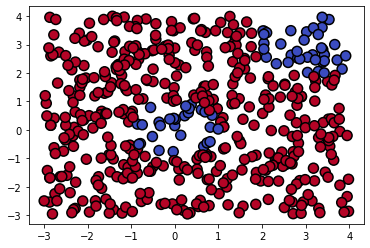

In [13]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_blobs, make_circles
import matplotlib.pyplot as plt
import numpy as np


%matplotlib inline

RANDOM_SEED = 139

def get_labels(data):
    labels = []
    for idx, item in enumerate(data):
        if item[0]**2 + item[1]**2 < 1:
            labels.append(0)
        elif item[0] > 2 and item[1] > 2:
            labels.append(0)
        else:
            labels.append(1)
    return np.array(labels)

N = 500
train_data = 7 * np.random.random_sample((N,2)) - np.array([3,3])

train_labels = get_labels(train_data)

# Let’s write an auxiliary function that will return grid for further visualization.
def get_grid(data):
    x_min, x_max = data[:, 0].min() - 1, data[:, 0].max() + 1
    y_min, y_max = data[:, 1].min() - 1, data[:, 1].max() + 1
    return np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

shallow_rf = RandomForestClassifier(n_estimators=5, max_depth=3, n_jobs=-1, 
                                    random_state=RANDOM_SEED)
deep_rf = RandomForestClassifier(n_estimators=5, max_depth=100, n_jobs=-1, 
                                 random_state=RANDOM_SEED)

# training the tree
shallow_rf.fit(train_data, train_labels)
deep_rf.fit(train_data, train_labels)

# some code to depict separating surface
xx, yy = get_grid(train_data)
predicted_shallow = shallow_rf.predict(np.c_[xx.ravel(), 
                                   yy.ravel()]).reshape(xx.shape)
predicted_deep = deep_rf.predict(np.c_[xx.ravel(), 
                                   yy.ravel()]).reshape(xx.shape)

plt.scatter(train_data[:, 0], train_data[:, 1], c=train_labels, s=100, 
            cmap='coolwarm', edgecolors='black', linewidth=1.5);

Text(0.5, 1.0, 'Deep Random Forest')

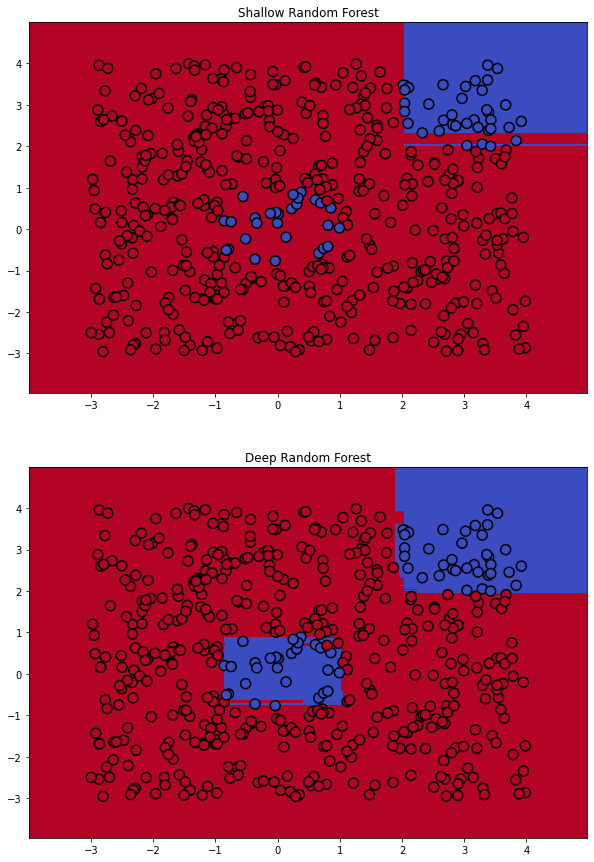

In [14]:
fig, ax = plt.subplots(2, 1, figsize=(10,15))

ax[0].pcolormesh(xx, yy, predicted_shallow, cmap='coolwarm')
ax[0].scatter(train_data[:, 0], train_data[:, 1], c=train_labels, s=100, 
            cmap='coolwarm', edgecolors='black', linewidth=1.5);
ax[0].set_title('Shallow Random Forest')

ax[1].pcolormesh(xx, yy, predicted_deep, cmap='coolwarm')
ax[1].scatter(train_data[:, 0], train_data[:, 1], c=train_labels, s=100, 
            cmap='coolwarm', edgecolors='black', linewidth=1.5);
ax[1].set_title('Deep Random Forest')

In [16]:
import pandas as pd
spam = pd.read_csv('https://raw.githubusercontent.com/vincentarelbundock/Rdatasets/master/csv/DAAG/spam7.csv')

In [17]:
spam.head()

,Unnamed: 0,crl.tot,dollar,bang,money,n000,make,yesno
0,1,278,0.000,0.778,0.00,0.00,0.00,y
1,2,1028,0.180,0.372,0.43,0.43,0.21,y
2,3,2259,0.184,0.276,0.06,1.16,0.06,y
3,4,191,0.000,0.137,0.00,0.00,0.00,y
4,5,191,0.000,0.135,0.00,0.00,0.00,y


In [19]:
spam.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4601 entries, 0 to 4600
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  4601 non-null   int64  
 1   crl.tot     4601 non-null   int64  
 2   dollar      4601 non-null   float64
 3   bang        4601 non-null   float64
 4   money       4601 non-null   float64
 5   n000        4601 non-null   float64
 6   make        4601 non-null   float64
 7   yesno       4601 non-null   object 
dtypes: float64(5), int64(2), object(1)
memory usage: 287.7+ KB


In [26]:
spam['spam'] = spam['yesno'].apply(lambda x: 0 if x == 'n' else 1)

In [31]:
spam = spam.drop(['Unnamed: 0', 'yesno'], axis = 1)

In [32]:
spam.head()

,crl.tot,dollar,bang,money,n000,make,spam
0,278,0.000,0.778,0.00,0.00,0.00,1
1,1028,0.180,0.372,0.43,0.43,0.21,1
2,2259,0.184,0.276,0.06,1.16,0.06,1
3,191,0.000,0.137,0.00,0.00,0.00,1
4,191,0.000,0.135,0.00,0.00,0.00,1


In [33]:
X = spam.drop(['spam'], axis = 1)
y = spam['spam']

In [35]:
from sklearn.preprocessing import PolynomialFeatures
pf = PolynomialFeatures(interaction_only = True, include_bias = False)
poly_data = pf.fit_transform(X)
poly_cols = pf.get_feature_names(X.columns)

# по требованию задания комбинации признаков должны называться как "признак1_признак2"
poly_cols = [x.replace(' ', '_') for x in poly_cols]

poly_X = pd.DataFrame(poly_data, columns = poly_cols)

In [39]:
poly_X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4601 entries, 0 to 4600
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   crl.tot         4601 non-null   float64
 1   dollar          4601 non-null   float64
 2   bang            4601 non-null   float64
 3   money           4601 non-null   float64
 4   n000            4601 non-null   float64
 5   make            4601 non-null   float64
 6   crl.tot_dollar  4601 non-null   float64
 7   crl.tot_bang    4601 non-null   float64
 8   crl.tot_money   4601 non-null   float64
 9   crl.tot_n000    4601 non-null   float64
 10  crl.tot_make    4601 non-null   float64
 11  dollar_bang     4601 non-null   float64
 12  dollar_money    4601 non-null   float64
 13  dollar_n000     4601 non-null   float64
 14  dollar_make     4601 non-null   float64
 15  bang_money      4601 non-null   float64
 16  bang_n000       4601 non-null   float64
 17  bang_make       4601 non-null   f

Разделим получившися данные на обучающую и тестовую выборки в соотношение 80:20. Обучите модель GradientBoostingClassifier (из библиотеки sklearn) с параметрами по умолчанию (на момент создания урока это learning_rate=0.1, n_estimators=100,max_depth=3, min_samples_split=2, min_samples_leaf=1, subsample=1,max_features=None).

Во всех методах, где присутствует случайность, укажите random_state=42.

Это будет наш baseline. Укажите точность accuracy на тестовой выборке (параметр score), округлив до третьего знака после точки-разделителя.

In [47]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import accuracy_score
X_train, X_test, y_train, y_test = train_test_split(poly_X, y, test_size = 0.2, random_state = 42)

gbc = GradientBoostingClassifier(learning_rate = 0.1, n_estimators = 100,max_depth = 3, min_samples_split = 2, 
                                 min_samples_leaf = 1, subsample = 1,max_features = None, random_state = 42)
gbc.fit(X_train,y_train)
accuracy_score(gbc.predict(X_test),y_test)

0.8653637350705755

Воспользуйтесь методом feature_importances_. С его помощью вы можете оценить вклад каждого признака в обучение модели. Постройте столбчатую диаграмму, где по горизонтали указаны названия признаков, а по вертикали их важность. В ответе укажите третий по важности признак (без кавычек и пробелов).

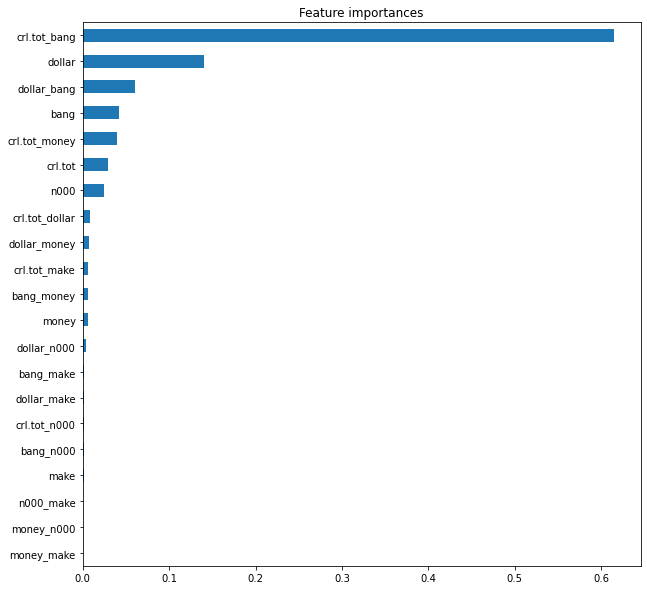

In [51]:
plt.rcParams['figure.figsize'] = (10,10)
plt.title('Feature importances')
feat_importances = pd.Series(gbc.feature_importances_, index = poly_X.columns)
feat_importances.sort_values().plot(kind='barh')

Теперь перейдем к подбору параметров в модели. Для этого в библиотеке scikit-learn есть метод GridSearchCV. Ему на вход подается модель, список параметров и способ оценивания. При запуске метода fit модель обучается со всеми возможными комбинациями параметров, лучшей комбинацией параметров становятся та, при которой значение метрики максимально.

Укажите в качестве estimator градиетный бустинг с параметрами по дефолту и random_state=42. В параметре scoring укажите 'accuracy', n_jobs=-1, cv=5.

Сетку параметров задайте такой:

param_grid = {'learning_rate':[0.00001, 0.0001, 0.001, 0.01, 0.1, 1], 
              'n_estimators':[100, 250, 500, 750, 1000, 1250, 1500, 1750]}
В ответе укажите точность, округленную до Трёх знаков после точки разделителя, для лучших параметров на кросс-валидации. Для этого посмотрите в документации sklearn, какой атрибут GridSearchCV за это отвечает.


In [53]:
from sklearn.model_selection import GridSearchCV
clf_GS = GridSearchCV(estimator = gbc, 
                      param_grid = {'learning_rate':[0.00001, 0.0001, 0.001, 0.01, 0.1, 1],
                      'n_estimators':[100, 250, 500, 750, 1000, 1250, 1500, 1750]},
                      scoring = 'accuracy', n_jobs = -1, cv = 5)
best_model = clf_GS.fit(X_train, y_train)
best_model.best_score_

TypeError: 'numpy.float64' object is not callable

In [55]:
best_model.best_score_

0.8836956521739131

In [56]:
best_model.best_params_

{'learning_rate': 0.01, 'n_estimators': 1250}

Подбор параметров — незаменимый инструмент при настройке моделей. Однако, если данных очень много, а модель сложная, то иногда имеет смысл ограничить количество параметров, которые вы хотите перебрать. Если модель с одним набором параметров обучается 30 минут, а вы хотите перебрать 10 таких наборов, то стоит приготовиться к пятичасовому ожиданию. Также стоит учитывать, что размер некоторых параметров влияет на время, потраченное на обучение моделей. Например, менее глубокие деревья учатся быстрее, чем глубокие.

При использовании GridSearchCV перебираются все возможные способы комбинации параметров. Сколько разных моделей (моделей градиентного бустинга с разными наборами параметров) обучилось в прошлом задании?

Ответ: 48, потому что умножили количество значений learning_rate на количество значение количества моделей

Теперь воспользуемся GridSearchCV для подбора максимальной глубины (max_depth). В качестве estimator используйте градиентный бустинг с раннеее подобранными параметрами и random_state=42. Переберите все значения max_depth от 5 до 15 включительно. В ответ запишите значение параметра, при котором точность максимальна.

In [54]:
param_grid = {'max_depth':list(range(5, 16))}

deep = GridSearchCV(estimator = GradientBoostingClassifier(learning_rate=0.01, n_estimators=1250, random_state=42), 
            param_grid = param_grid, scoring='accuracy', n_jobs=-1, cv=5)
deep.fit(X_train,y_train)

print(deep.best_params_['max_depth'])

5


In [61]:
def AdaBoost_scratch(X, y, M = 10, learning_rate = 1):
    # инициалиазция служебных переменных
    N = len(y)
    estimator_list, y_predict_list, estimator_error_list, estimator_weight_list, sample_weight_list = [], [],[],[],[]

    # инициализация весов
    sample_weight = np.ones(N) / N
    sample_weight_list.append(sample_weight.copy())

    # цикл по длине М
    for m in range(M):   

        # обучим базовую модель и получим предсказание
        estimator = DecisionTreeClassifier(max_depth = 1, max_leaf_nodes=2)
        estimator.fit(poly_X, y, sample_weight = sample_weight)
        y_predict = estimator.predict(X)

        # Маска для ошибок классификации
        incorrect = (y_predict != y)

        # Оцениваем ошибку
        estimator_error = (incorrect * sample_weight).sum()
        
        # Вычисляем вес нового алгоритма
        estimator_weight =  learning_rate * (np.log((1 - estimator_error)/estimator_error))

        # Получаем новые веса объектов
        sample_weight *= np.exp(estimator_weight * incorrect * ((sample_weight > 0) | (estimator_weight < 0)))

        # Сохраяем результаты данной итерации
        estimator_list.append(estimator)
        y_predict_list.append(y_predict.copy())
        estimator_error_list.append(estimator_error.copy())
        estimator_weight_list.append(estimator_weight.copy())
        sample_weight_list.append(sample_weight.copy())
        


    # Для удобства переведем в numpy.array   
    estimator_list = np.asarray(estimator_list)
    y_predict_list = np.asarray(y_predict_list)
    estimator_error_list = np.asarray(estimator_error_list)
    estimator_weight_list = np.asarray(estimator_weight_list)
    sample_weight_list = np.asarray(sample_weight_list)

    # Получим предсказания
    preds = (np.array([np.sign((y_predict_list[:,point] * estimator_weight_list).sum()) for point in range(N)]))
    print('Accuracy = ', (preds == y).sum() / N) 
    
    return estimator_list, estimator_weight_list, sample_weight_list

estimator_list, estimator_weight_list, sample_weight_list  = AdaBoost_scratch(poly_X, y, M=10, learning_rate=0.001)

Accuracy =  0.8228645946533363


In [132]:
import pandas as pd
import numpy as np

from sklearn.ensemble import (AdaBoostClassifier, GradientBoostingClassifier,
                              RandomForestClassifier, ExtraTreesClassifier)
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.base import clone
from sklearn.neighbors import KNeighborsClassifier

from sklearn.model_selection import train_test_split, KFold, StratifiedKFold
from sklearn.metrics import f1_score
from sklearn.datasets import load_digits

from tqdm import tqdm

from sklearn.model_selection import RandomizedSearchCV
from scipy.stats.distributions import randint

In [133]:
dataset = load_digits()
X, y = dataset['data'], dataset['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42, test_size = 0.2)

В скринкасте мы разобрали схему генерации признаков в стекинге, когда для тестовой выборки алгоритм заново переобучался на всей тренировочной выборке. Реализуйте схему, когда вместо этого производится агрегация ответов всех обученных на фолдах классификаторов на тестовой выборке при помощи усреднения.

Логика решения:
1) Создадим X_meta_test, заполним его нулями (по аналогии с X_meta_train);
2) Далее на каждом шаге, где мы обучаем folded_clf.fit (X_fold_train, y_fold_train) и его предсказания на X_fold_predict запихиваем в X_meta_train[predict_fold_index] добавим еще одну строку, где в X_meta_test будем добавлять предсказания вероятностей folded_clf на X_test. Их можно сразу складывать друг с другом или сохранить много массивов, тогда в конце их нужно будет все сложить, а потом делить на количество сплитов (количество массивов равно количеству сплитов в кросс - валидации);
3) После цикла останется только усреднить все эти массивы, это и будет наш X_meta_test.


In [ ]:
# не верно
def compute_meta_feature(clf, X_train, X_test, y_train, cv):
    """    Эта функция подсчитывает признаки для мета-классификатора.     
    Они являются вероятностями классов при решении задачи многоклассовой классификации.    
    :arg clf: классификатор    
    :args X_train, y_train: обучающая выборка    
    :arg X_test: признаки тестовой выборки    
    :arg cv: класс, генерирующий фолды (KFold)    
    :returns X_meta_train, X_meta_test: 
    новые признаки для обучающей и тестовой выборок    """
    
    n_classes = len(np.unique(y_train))
    X_meta_train = np.zeros((len(X_train), n_classes), dtype = np.float32)
    X_meta_test = np.zeros((len(X_train), n_classes), dtype = np.float32)
    
    for train_fold_index, predict_fold_index in cv.split(X_train):
        X_fold_train, X_fold_predict = X_train[train_fold_index], X_train[predict_fold_index]
        y_fold_train = y_train[train_fold_index]

        folded_clf = clone(clf)
        folded_clf.fit(X_fold_train, y_fold_train)

        X_meta_train[predict_fold_index] = folded_clf.predict_proba(X_fold_predict)
    
       # В X_meta_test суммируем предсказанные вероятности на каждой итерации
        X_meta_test += folded_clf.predict_proba(X_test)
       
        X_meta_test = X_meta_test.argmax(axis = 1)
   
       # усреднить вероятности:
        X_meta_test /= cv.n_splits
        return X_meta_train, X_meta_test
    
    meta_clf = clone(clf)
    meta_clf.fit(X_train, y_train)

    X_meta_test = meta_clf.predict_proba(X_test)

    return X_meta_train, X_meta_test

In [134]:
def compute_meta_feature_mean(clf, X_train, X_test, y_train, cv):
    n_classes = len(np.unique(y_train))
    X_meta_train = np.zeros((len(X_train), n_classes), dtype = np.float32)
    X_meta_test = np.zeros((len(X_test), n_classes), dtype = np.float32)
    for train_fold_index, predict_fold_index in cv.split(X_train):        
        X_fold_train, X_fold_predict = X_train[train_fold_index], X_train[predict_fold_index]
        y_fold_train = y_train[train_fold_index]
        
        folded_clf = clone(clf)
        folded_clf.fit(X_fold_train, y_fold_train)
        X_meta_train[predict_fold_index] = folded_clf.predict_proba(X_fold_predict)
        
        # We sum all of the predictions across folds and then divide the sum by the number of folds
        X_meta_test += folded_clf.predict_proba(X_test)
    
    X_meta_test /= cv.n_splits
    return X_meta_train, X_meta_test

In [135]:
def compute_meta_feature(clf, X_train, X_test, y_train, cv):
    
    n_classes = len(np.unique(y_train))
    X_meta_train = np.zeros((len(y_train), n_classes), dtype=np.float32)

    splits = cv.split(X_train)
    for train_fold_index, predict_fold_index in splits:
        X_fold_train, X_fold_predict = X_train[train_fold_index], X_train[predict_fold_index]
        y_fold_train = y_train[train_fold_index]
        
        folded_clf = clone(clf)
        folded_clf.fit(X_fold_train, y_fold_train)
        
        X_meta_train[predict_fold_index] = folded_clf.predict_proba(X_fold_predict)
    
    meta_clf = clone(clf)
    meta_clf.fit(X_train, y_train)
    
    X_meta_test = meta_clf.predict_proba(X_test)
    
    return X_meta_train, X_meta_test

In [136]:
def generate_meta_features(classifiers, X_train, X_test, y_train, cv):
   
    features = [
        compute_meta_feature(clf, X_train, X_test, y_train, cv)
        for clf in tqdm(classifiers)
    ]
    
    stacked_features_train = np.hstack([
        features_train for features_train, features_test in features
    ])

    stacked_features_test = np.hstack([
        features_test for features_train, features_test in features
    ])
    
    return stacked_features_train, stacked_features_test

In [77]:
cv = KFold(n_splits = 10, shuffle = True, random_state = 42)

def compute_metric(clf, X_train = X_train, y_train = y_train, X_test = X_test):
    clf.fit(X_train, y_train)
    y_test_pred = clf.predict(X_test)
    return np.round(f1_score(y_test, y_test_pred, average ='macro'), 6)

Используйте функцию generate_meta_features для стекинга следующих алгоритмов:
логистическая регрессия с L1-регуляризацией, C=0.001, солвер — 'saga', схема работы мультиклассовой классификации — one-vs-rest, максимальное допустимое количество итераций — 2000
логистическая регрессия с L2-регуляризацией, C=0.001, солвер — 'saga', схема работы мультиклассовой классификации — multinomial, максимальное допустимое количество итераций — 2000
случайный лес из 300 деревьев
градиентный бустинг из 200 деревьев
Как мета-алгоритм используйте логистическую регрессию без регуляризации со схемой работы мультиклассовой классификации — auto и солвером 'lbfgs'.
Посчитайте качество при помощи передачи новых признаков в функцию compute_metric.

In [81]:
stacked_features_train, stacked_features_test = generate_meta_features([
    LogisticRegression(C = 0.001, penalty = 'l1', solver = 'saga', multi_class = 'ovr', max_iter = 2000),
    LogisticRegression(C=0.001, penalty = 'l2', solver = 'saga', multi_class = 'multinomial', max_iter = 5000),  
    RandomForestClassifier(n_estimators = 300, n_jobs=-1),
    GradientBoostingClassifier(n_estimators = 200)
], X_train, X_test, y_train, cv)



  0%|          | 0/4 [00:00<?, ?it/s]

 25%|██▌       | 1/4 [01:46<05:20, 106.92s/it]

 50%|█████     | 2/4 [01:52<01:34, 47.46s/it] 

 25%|██▌       | 1/4 [14:29<43:28, 869.59s/it][A


100%|██████████| 4/4 [07:09<00:00, 107.37s/it]


In [82]:
total_features_train = np.hstack([X_train, stacked_features_train])
total_features_test = np.hstack([X_test, stacked_features_test])

In [83]:
np.random.seed(42)
clf = LogisticRegression(penalty = 'none', multi_class = 'auto', solver = 'lbfgs')
clf.fit(stacked_features_train, y_train)

LogisticRegression(penalty='none')

In [84]:
compute_metric(clf, X_train = stacked_features_train, y_train = y_train, X_test = stacked_features_test)

0.983962

Используйте функцию generate_meta_features для стекинга следующих алгоритмов:
случайный лес из 300 деревьев
случайный лес из 200 экстремальных деревьев
Как мета-алгоритм используйте логистическую регрессию без регуляризации со схемой работы мультиклассовой классификации — auto и солвером 'lbfgs'.
Посчитайте качество при помощи передачи новых признаков в функцию compute_metric.

In [85]:
stacked_features_train, stacked_features_test = generate_meta_features([
    RandomForestClassifier(n_estimators = 300, n_jobs = -1, random_state = 42),
    ExtraTreesClassifier(n_estimators = 200, n_jobs = -1, random_state = 42)
], X_train, X_test, y_train, cv)

100%|██████████| 2/2 [00:43<00:00, 21.56s/it]


In [86]:
total_features_train = np.hstack([X_train, stacked_features_train])
total_features_test = np.hstack([X_test, stacked_features_test])

In [87]:
np.random.seed(42)
clf = LogisticRegression(penalty = 'none', multi_class = 'auto', solver = 'lbfgs')
clf.fit(stacked_features_train, y_train)

LogisticRegression(penalty='none')

In [88]:
compute_metric(clf, X_train = stacked_features_train, y_train = y_train, X_test = stacked_features_test)

0.982421

Используйте функцию generate_meta_features для стекинга следующих алгоритмов:
метод ближайшего соседа (k-NN) со стандартными параметрами
случайный лес из 300 экстремальных деревьев
Как мета-алгоритм используйте логистическую регрессию без регуляризации со схемой работы мультиклассовой классификации — auto и солвером 'lbfgs'.
Посчитайте качество при помощи передачи новых признаков в функцию compute_metric.

In [89]:
stacked_features_train, stacked_features_test = generate_meta_features([
    KNeighborsClassifier(),
    ExtraTreesClassifier(n_estimators = 300,random_state = 42),
], X_train, X_test, y_train, cv)

100%|██████████| 2/2 [00:21<00:00, 10.54s/it]


In [90]:
np.random.seed(42)
clf = LogisticRegression(penalty = 'none', multi_class = 'auto', solver = 'lbfgs')
clf.fit(stacked_features_train, y_train)

/Users/Ivan/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(penalty='none')

In [91]:
compute_metric(clf, X_train = stacked_features_train, y_train = y_train, X_test = stacked_features_test)

/Users/Ivan/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.989904

Используйте функцию generate_meta_features для стекинга следующих алгоритмов:
логистическая регрессия с L1-регуляризацией, C=0.001, солвер — 'saga', схема работы мультиклассовой классификации — one-vs-rest, максимальное допустимоей количество итераций — 2000
метод ближайшего соседа со стандартными параметрами
случайный лес из 300 экстремальных деревьев
AdaBoost со стандартными параметрами
Как мета-алгоритм используйте логистическую регрессию без регуляризации со схемой работы мультиклассовой классификации — auto и солвером 'lbfgs'.
Посчитайте качество при помощи передачи новых признаков в функцию compute_metric.
  нет ответа 

In [95]:
stacked_features_train, stacked_features_test = generate_meta_features([
    LogisticRegression(C = 0.001, penalty = 'l1', solver = 'saga', multi_class = 'ovr', max_iter = 2000),
    KNeighborsClassifier(),
    ExtraTreesClassifier(n_estimators = 300,random_state = 42),
    AdaBoostClassifier(random_state = 42)
], X_train, X_test, y_train, cv)

100%|██████████| 4/4 [02:27<00:00, 36.76s/it] 


In [96]:
np.random.seed(42)
clf = LogisticRegression(penalty = 'none', multi_class = 'auto', solver = 'lbfgs')
clf.fit(stacked_features_train, y_train)

LogisticRegression(penalty='none')

In [97]:
compute_metric(clf, X_train = stacked_features_train, y_train = y_train, X_test = stacked_features_test)

0.987404

Используйте функцию generate_meta_features для стекинга следующих алгоритмов:
случайный лес из 300 деревьев
случайный лес из 300 экстремальных деревьев
Для генерации фолдов используйте класс StratifiedKFold, который позволяет делать так называемые стратифицированные разбиения (в каждом фолде будет одинаковое соотношение классов).
Для корректной работы необходимо подправить код в функции compute_meta_feature. Как мета-алгоритм используйте логистическую регрессию без регуляризации со схемой работы мультиклассовой классификации — auto и солвером 'lbfgs'.
Посчитайте качество при помощи передачи новых признаков в функцию compute_metric. Количество фолдов = 10

In [104]:
cv = StratifiedKFold(n_splits = 20, shuffle = True, random_state = 42)

In [137]:
def compute_meta_feature(clf, X_train, X_test, y_train, cv):
    
    n_classes = len(np.unique(y_train))
    X_meta_train = np.zeros((len(y_train), n_classes), dtype=np.float32)

    splits = cv.split(X_train, y_train)
    for train_fold_index, predict_fold_index in splits:
        X_fold_train, X_fold_predict = X_train[train_fold_index], X_train[predict_fold_index]
        y_fold_train = y_train[train_fold_index]
        
        folded_clf = clone(clf)
        folded_clf.fit(X_fold_train, y_fold_train)
        
        X_meta_train[predict_fold_index] = folded_clf.predict_proba(X_fold_predict)
    
    meta_clf = clone(clf)
    meta_clf.fit(X_train, y_train)
    
    X_meta_test = meta_clf.predict_proba(X_test)
    
    return X_meta_train, X_meta_test

In [105]:
stacked_features_train, stacked_features_test = generate_meta_features([
    RandomForestClassifier(n_estimators = 300, n_jobs = -1, random_state = 42),
    ExtraTreesClassifier(n_estimators = 300, n_jobs = -1, random_state = 42)
], X_train, X_test, y_train, cv)

100%|██████████| 2/2 [01:30<00:00, 45.31s/it]


In [101]:
total_features_train = np.hstack([X_train, stacked_features_train])
total_features_test = np.hstack([X_test, stacked_features_test])

In [106]:
np.random.seed(42)
clf = LogisticRegression(penalty = 'none', multi_class = 'auto', solver = 'lbfgs')
clf.fit(stacked_features_train, y_train)

LogisticRegression(penalty='none')

In [122]:
compute_metric(clf, X_train = stacked_features_train, y_train = y_train, X_test = stacked_features_test)

0.98417

In [119]:
cv = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 42)
stacked_features_train, stacked_features_test = generate_meta_features([
    RandomForestClassifier(n_estimators = 300, n_jobs = -1, random_state = 42),
    ExtraTreesClassifier(n_estimators = 300, n_jobs = -1, random_state = 42)
], X_train, X_test, y_train, cv)
np.random.seed(42)
clf = RandomForestClassifier()
clf.fit(stacked_features_train, y_train)

100%|██████████| 2/2 [00:24<00:00, 12.08s/it]


RandomForestClassifier()

In [121]:
cv = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 42)
stacked_features_train, stacked_features_test = generate_meta_features([
    RandomForestClassifier(n_estimators = 300, n_jobs = -1, random_state = 42),
    ExtraTreesClassifier(n_estimators = 300, n_jobs = -1, random_state = 42)
], X_train, X_test, y_train, cv)
np.random.seed(42)
clf = KNeighborsClassifier()
clf.fit(stacked_features_train, y_train)

100%|██████████| 2/2 [00:17<00:00,  8.93s/it]


KNeighborsClassifier()

In [123]:
cv = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 42)
stacked_features_train, stacked_features_test = generate_meta_features([
    RandomForestClassifier(n_estimators = 300, n_jobs = -1, random_state = 42),
    ExtraTreesClassifier(n_estimators = 300, n_jobs = -1, random_state = 42)
], X_train, X_test, y_train, cv)
np.random.seed(42)
clf = GradientBoostingClassifier(random_state = 42)
clf.fit(stacked_features_train, y_train)

100%|██████████| 2/2 [00:20<00:00, 10.10s/it]


GradientBoostingClassifier(random_state=42)

In [124]:
compute_metric(clf, X_train = stacked_features_train, y_train = y_train, X_test = stacked_features_test)

0.984925

Используйте функцию generate_meta_features для стекинга следующих алгоритмов:
случайный лес из 300 деревьев, критерий Джини, максимальная глубина — 24
случайный лес из 300 экстремальных деревьев
Для генерации фолдов используйте класс StratifiedKFold, который позволяет делать так называемые стратифицированные разбиения (в каждом фолде будет одинаковое соотношение классов).
Для генерации фолдов используйте класс StratifiedKFold и поправленный Вами ранее код в функции compute_meta_feature.
Выполните разбиение на 3 фолда.
Как мета-алгортм используйте случайный лес из 100 экстремальных деревьев. Посчитайте качество при помощи передачи новых признаков в функцию compute_metric.


In [147]:
cv = StratifiedKFold(n_splits = 3, shuffle = True, random_state = 42)
stacked_features_train, stacked_features_test = generate_meta_features([
    RandomForestClassifier(n_estimators = 300, max_depth = 24, criterion = 'gini', n_jobs = -1, random_state = 42),
    ExtraTreesClassifier(n_estimators = 300, n_jobs = -1, random_state = 42), 
], X_train, X_test, y_train, cv)
np.random.seed(42)
clf = ExtraTreesClassifier(n_estimators = 100, n_jobs = -1, random_state = 42)
clf.fit(stacked_features_train, y_train)

100%|██████████| 2/2 [00:10<00:00,  5.29s/it]


ExtraTreesClassifier(n_jobs=-1, random_state=42)

In [148]:
compute_metric(clf, X_train = stacked_features_train, y_train = y_train, X_test = stacked_features_test)

0.986498

Обучите на тренировочной выборке следующие алгоритмы:
случайный лес из 300 деревьев, критерий Джини, максимальная глубина — 24
случайный лес из 300 экстремальных деревьев
логистическую регрессию со стандартными параметрами
Усредните их ответы на тестовой выборке методом сложения предсказаний и затем взятия функции argmax: answer = (prediction1 + prediction2 + prediction3).argmax(axis = 1).
Посчитайте качество, аналогично функции compute_metric (F1-score с макро-усреднением, округленный до 6 знака).


In [140]:
def compute_predicts(classifiers, X_train, y_train, X_test):
    predicts = []
    for clf in classifiers:
        clf.fit(X_train, y_train)
        predicts.append(clf.predict_proba(X_test))
    return predicts


predicts = compute_predicts([ 
    RandomForestClassifier(n_estimators = 300, max_depth = 24, criterion = 'gini', n_jobs = -1, random_state = 42),
    ExtraTreesClassifier(n_estimators = 300, n_jobs=-1, random_state=42), 
    LogisticRegression()
], X_train, y_train, X_test)

y_pred = np.sum(predicts, axis=0).argmax(axis=1)
print(np.round(f1_score(y_test, y_pred, average='macro'), 6))

0.976259


/Users/Ivan/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
